In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
x_train=pd.read_csv("train (2).csv")
x_test=pd.read_csv("test (2).csv")

In [335]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [336]:
x_train.shape

(8693, 14)

In [337]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [338]:
x_train.drop(labels=["PassengerId","Name"],axis=1,inplace=True)

In [339]:
x_train.describe(include=("object","bool"))

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
count,8492,8476,8494,8511,8490,8693
unique,3,2,6560,3,2,2
top,Earth,False,G/734/S,TRAPPIST-1e,False,True
freq,4602,5439,8,5915,8291,4378


In [340]:
x_train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [341]:
colum=x_train.columns
for cols in colum:
  if (x_train[cols].dtype !="float64"):
    print(x_train[cols].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64
True     4378
False    4315
Name: Transported, dtype: int64


In [342]:
import seaborn as sns

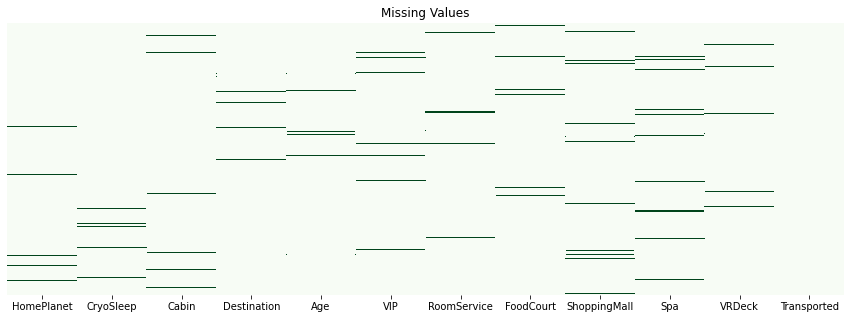

In [343]:
plt.figure(figsize=(15,5))
plt.title("Missing Values")
sns.heatmap(x_train.isna(),yticklabels=False,cbar=False,cmap="Greens")

In [344]:
x_train["VIP"]=x_train["VIP"].astype("bool")
x_train["CryoSleep"]=x_train["CryoSleep"].astype("bool")
x_train["HomePlanet"]=x_train["HomePlanet"].fillna(x_train["HomePlanet"].mode())
x_train["Destination"]=x_train["Destination"].fillna(x_train["Destination"].mode())
x_train["VIP"]=x_train["VIP"].fillna(x_train["VIP"].mode())
x_train["CryoSleep"]=x_train["CryoSleep"].fillna(x_train["CryoSleep"].mode())
x_train["RoomService"]=x_train["RoomService"].fillna(x_train["RoomService"].median())
x_train["FoodCourt"]=x_train["FoodCourt"].fillna(x_train["FoodCourt"].median())
x_train["ShoppingMall"]=x_train["ShoppingMall"].fillna(x_train["ShoppingMall"].median())
x_train["Spa"]=x_train["Spa"].fillna(x_train["Spa"].median())
x_train["VRDeck"]=x_train["VRDeck"].fillna(x_train["VRDeck"].median())
x_train["Age"]=x_train["Age"].fillna(x_train["Age"].mean())
x_train["Cabin"]=x_train["Cabin"].fillna("B/0/S")

In [345]:
x_train.isna().sum().sum()

383

In [346]:
x_train['Cabin_Side'] = x_train['Cabin'].str.split("/").str[2]
x_train['Cabin_Deck'] = x_train['Cabin'].str.split("/").str[0]
x_train = x_train.drop('Cabin',axis=1)

In [347]:
x_train["Totalexp"]=x_train["RoomService"]+x_train["FoodCourt"]+x_train["ShoppingMall"]+x_train["Spa"]

In [348]:
x_train=x_train.dropna()

In [349]:
x_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_Side', 'Cabin_Deck', 'Totalexp'],
      dtype='object')

#Data Visualization

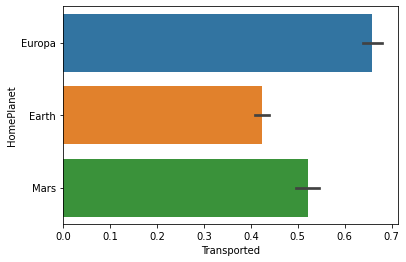

In [350]:
sns.barplot(x="Transported",y="HomePlanet",data=x_train)

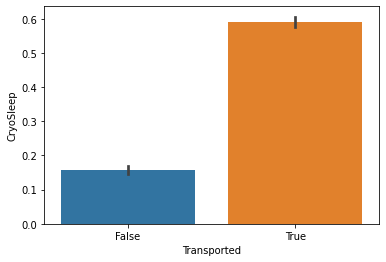

In [351]:
sns.barplot(x="Transported",y="CryoSleep",data=x_train)

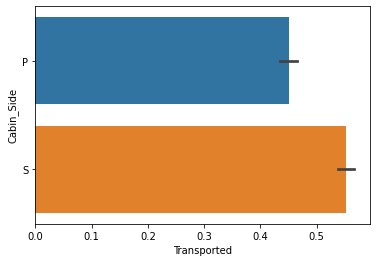

In [352]:
sns.barplot(x="Transported",y="Cabin_Side",data=x_train)

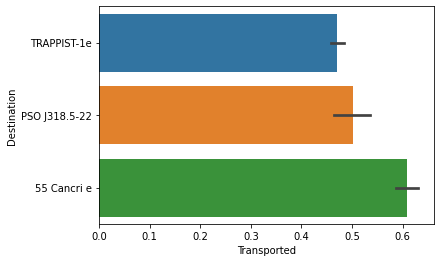

In [353]:
sns.barplot(x="Transported",y="Destination",data=x_train)

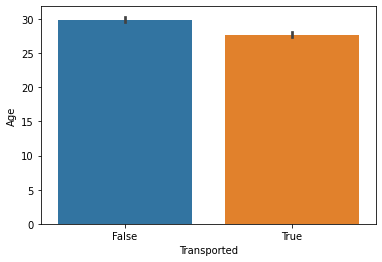

In [354]:
sns.barplot(x="Transported",y="Age",data=x_train)

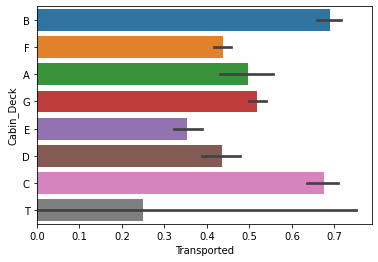

In [355]:
sns.barplot(x="Transported",y="Cabin_Deck",data=x_train)

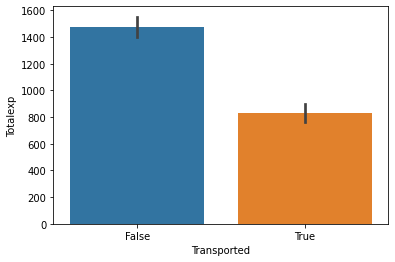

In [356]:
sns.barplot(x="Transported",y="Totalexp",data=x_train)

In [357]:
x_train['CryoSleep'].replace({False:0,True:1},inplace=True)
x_train['Transported'].replace({False:0,True:1},inplace=True)
x_train['VIP'].replace({False:0,True:1},inplace=True)

In [358]:
x_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_Side', 'Cabin_Deck', 'Totalexp'],
      dtype='object')

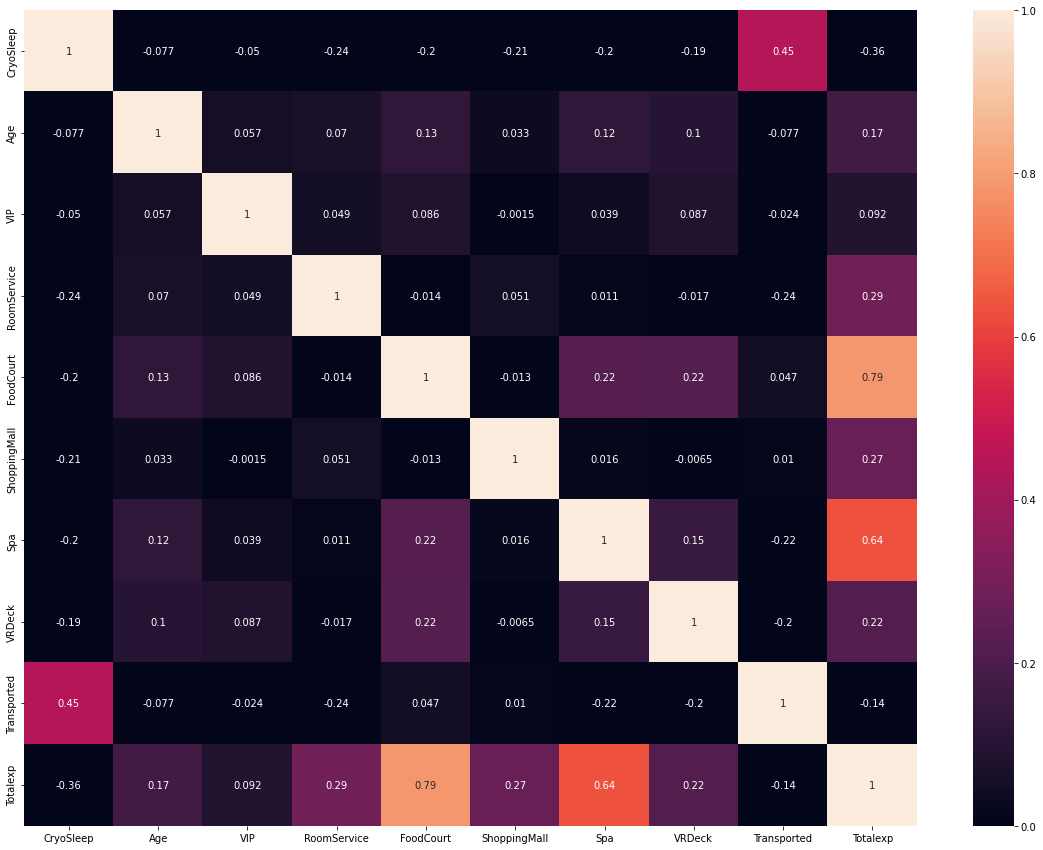

In [359]:
f = plt.figure(figsize=(20,15))
sns.heatmap(x_train.corr(),annot=True,vmin=0,vmax=1)

In [360]:
x_train["HomePlanet"] = x_train["HomePlanet"].astype("category")
x_train['Destination'] = x_train['Destination'].astype('category')
x_train['Cabin_Deck'] = x_train['Cabin_Deck'].astype('category')
x_train['Cabin_Side'] = x_train['Cabin_Side'].astype('category')

In [361]:
x_train=pd.get_dummies(x_train,columns=["HomePlanet","Destination","Cabin_Deck","Cabin_Side"])

In [362]:
x_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Totalexp', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

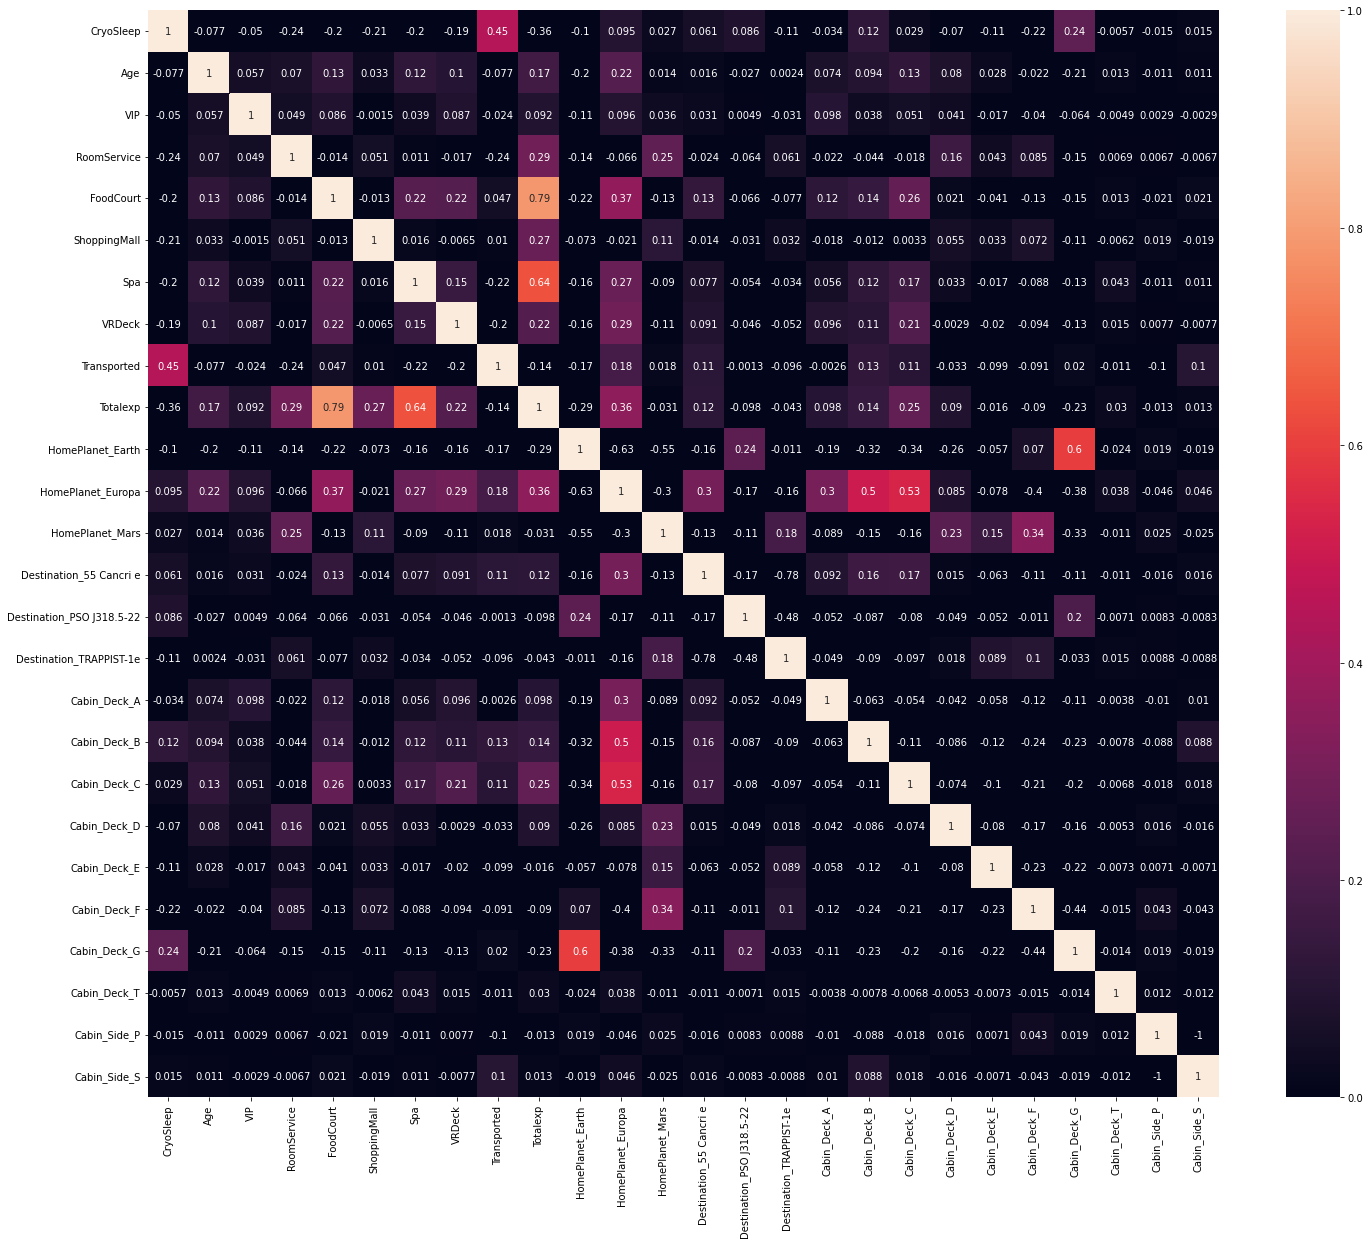

In [363]:
f=plt.figure(figsize=(24,20))
sns.heatmap(x_train.corr(),annot=True,vmin=0,vmax=1)

In [364]:
y=x_train["Transported"]
x=x_train.drop("Transported",axis="columns")


In [365]:
x.shape

(8314, 25)

In [366]:
y.shape

(8314,)

In [367]:
x.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Totalexp', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

In [368]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import (BernoulliNB,GaussianNB, MultinomialNB)

In [369]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [370]:
from catboost import CatBoostClassifier

In [371]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)

In [372]:
X_train.shape

(5819, 25)

In [373]:
y_train.shape

(5819,)

In [374]:
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Totalexp', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

In [375]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Random forest accuracy: {}".format(metrics.accuracy_score(y_test,rfc_pred)))
print()
print()


abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
print("Adaboost accuracy: {}".format(metrics.accuracy_score(y_test,abc_pred)))
print()


bag = BaggingClassifier()
bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)
print("Bagging accuracy: {}".format(metrics.accuracy_score(y_test,bag_pred)))
print()



hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train,y_train)
hgbc_pred = hgbc.predict(X_test)
print("Hist gradient boosting accuracy: {}".format(metrics.accuracy_score(y_test,hgbc_pred)))
print()


gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian NB accuracy: {}".format(metrics.accuracy_score(y_test,gnb_pred)))
print()


mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print("Multinomial NB accuracy: {}".format(metrics.accuracy_score(y_test,mnb_pred)))
print()

CBC = CatBoostClassifier(silent=True,depth=6,iterations=500)
CBC.fit(X_train, y_train)
CBC_pred = CBC.predict(X_test)
print("CBC accuracy: {}".format(metrics.accuracy_score(y_test,CBC_pred)))


Random forest accuracy: 0.7983967935871743


Adaboost accuracy: 0.7807615230460921

Bagging accuracy: 0.7847695390781563

Hist gradient boosting accuracy: 0.8028056112224449

Gaussian NB accuracy: 0.7374749498997996

Multinomial NB accuracy: 0.7707414829659318

CBC accuracy: 0.8112224448897796


###Cat boost is getting heighest accuracy

##Now preprocess test data to fit inside classifier

In [376]:
test=pd.read_csv("test (2).csv")

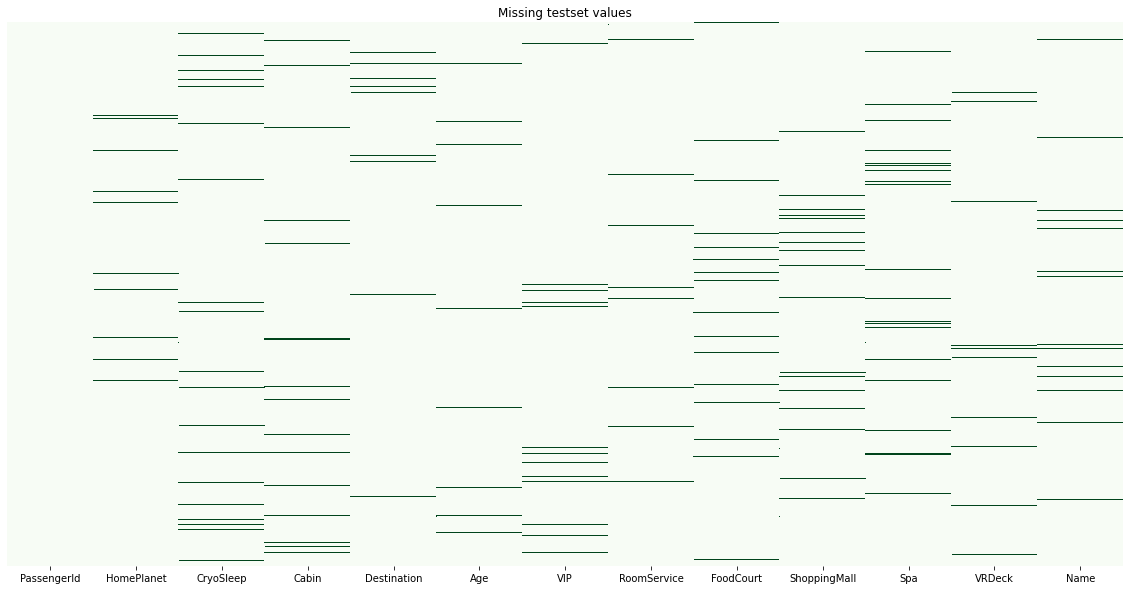

In [377]:
plt.figure(figsize=(20,10))
plt.title("Missing testset values")
sns.heatmap(test.isna(),yticklabels=False,cbar=False,cmap="Greens")

In [378]:
test.set_index('PassengerId',inplace=True)

In [379]:
test["VIP"]=test["VIP"].astype("bool")
test["CryoSleep"]=test["CryoSleep"].astype("bool")
test["HomePlanet"]=test["HomePlanet"].fillna(test["HomePlanet"].mode())
test["Destination"]=test["Destination"].fillna(test["HomePlanet"].mode())
test["VIP"]=test["VIP"].fillna(test["VIP"].mode())
test["CryoSleep"]=test["CryoSleep"].fillna(test["CryoSleep"].mode())
test["RoomService"]=test["RoomService"].fillna(test["RoomService"].median())
test["FoodCourt"]=test["FoodCourt"].fillna(test["FoodCourt"].median())
test["ShoppingMall"]=test["ShoppingMall"].fillna(test["ShoppingMall"].median())
test["Spa"]=test["Spa"].fillna(test["Spa"].median())
test["VRDeck"]=test["VRDeck"].fillna(test["VRDeck"].median())
test["Age"]=test["Age"].fillna(test["Age"].mean())
test["Cabin"]=test["Cabin"].fillna("B/0/S")

In [380]:
test['Cabin_Side'] = test['Cabin'].str.split("/").str[2]
test['Cabin_Deck'] = test['Cabin'].str.split("/").str[0]
test = test.drop('Cabin',axis=1)

In [381]:
test["Totalexp"]=test["RoomService"]+test["FoodCourt"]+test["ShoppingMall"]+test["Spa"]

In [382]:
test=test.dropna()

In [383]:
test.drop(labels=["Name"],axis=1,inplace=True)

In [384]:
test['CryoSleep'].replace({False:0,True:1},inplace=True)
test['VIP'].replace({False:0,True:1},inplace=True)

In [385]:
test['HomePlanet'] = test['HomePlanet'].astype('category')
test['Destination'] = test['Destination'].astype('category')
test['Cabin_Deck'] = test['Cabin_Deck'].astype('category')
test['Cabin_Side'] = test['Cabin_Side'].astype('category')

In [386]:
test = pd.get_dummies(test, columns=['HomePlanet','Destination','Cabin_Deck','Cabin_Side'])
test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Totalexp', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

In [387]:
y_pred=CBC.predict(test)

In [388]:
final=pd.DataFrame({"Transported":y_pred.astype(bool)},index=test.index)

In [389]:
final.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


In [390]:
final.to_csv("sample_submission (1).csv")